In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
sys.path.insert(1, "../")

In [10]:
data = scipy.io.loadmat("../data/v1_laminar.mat")
srate = int(data["srate"])
timevec = data["timevec"].flatten()  
time = np.arange(2*srate)/srate
time = time - np.mean(time)

data_ = data["csd"][5,:,:]
dataR = np.reshape(data_, -1, order="F")

ndata = len(dataR)
nkern = len(timevec)
nConv = ndata + nkern - 1
halfK = nkern//2

dataX = scipy.fft.fft(dataR, nConv)

minFreq =  5; 
maxFreq = 90; 
numFreq = 30; 

frex = np.linspace(minFreq,maxFreq,numFreq)

tf = np.zeros((numFreq,len(timevec)))

for fi in range(numFreq):
    
    cmw  = np.exp(1j*2*np.pi*frex[fi]*time) * np.exp( -4*np.log(2)*time**2 / (.3**2) )
    
    cmwX = scipy.fft.fft(cmw,nConv)
    cmwX = cmwX/max(cmwX)
    
    as_ = scipy.fft.ifft( dataX*cmwX )
    as_ = as_[halfK+1:-halfK+1]
    as_ = np.reshape(as_,data_.shape, order="F")
    
    aspow = abs(as_) ** 2
    
    tf[fi,:] = np.mean(aspow,1)

C:\Users\kerem\AppData\Local\Temp\ipykernel_2228\2654506792.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  srate = int(data["srate"])


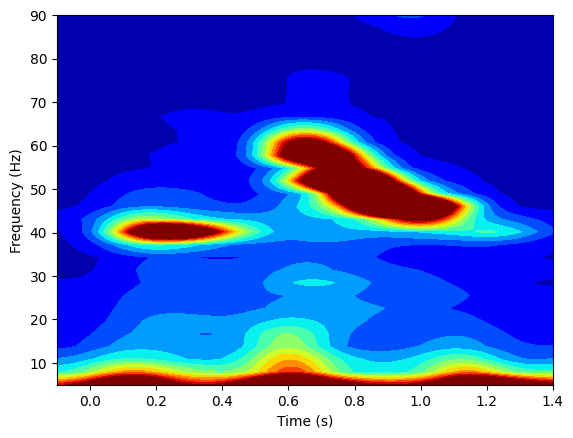

In [11]:
plt.contourf(timevec,frex,tf, 40, vmin=0, vmax=10000, cmap="jet")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.xlim([-.1,1.4])
plt.show()